In [61]:

import pandas as pd
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing


df = pd.read_csv("/Users/xuanloc/Downloads/campaign_data.csv")


In [62]:
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [63]:
df.columns.to_list()

['CampaignID',
 'GoalAmount',
 'RaisedAmount',
 'DurationDays',
 'NumBackers',
 'Category',
 'LaunchMonth',
 'Country',
 'Currency',
 'OwnerExperience',
 'VideoIncluded',
 'SocialMediaPresence',
 'NumUpdates',
 'IsSuccessful']

In [64]:
df.dtypes

CampaignID              object
GoalAmount               int64
RaisedAmount           float64
DurationDays             int64
NumBackers               int64
Category                object
LaunchMonth             object
Country                 object
Currency                object
OwnerExperience          int64
VideoIncluded           object
SocialMediaPresence      int64
NumUpdates               int64
IsSuccessful             int64
dtype: object

In [65]:
X = df.drop(df.select_dtypes(include=['object']).columns, axis=1)
Y = df['Category']
X

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
0,76159,73518.028955,15,1903,11,41758,3,0
1,69394,60068.683288,49,469,7,79112,48,0
2,18652,22958.153470,58,148,17,3942,9,1
3,19487,24229.048390,39,780,10,22047,35,1
4,26734,17984.630311,68,1622,12,72568,17,0
...,...,...,...,...,...,...,...,...
99995,80417,112068.932642,26,870,6,84173,8,1
99996,85052,100430.502040,78,1146,8,13913,42,1
99997,68407,102020.936312,87,636,2,45273,13,1
99998,59749,67026.111706,51,1276,10,67574,29,1


In [66]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.1, train_size=0.8, random_state=4)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 7
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
pred_y = neigh.predict(x_test)
print("Accuracy of model at K={} is {}".format(k, metrics.accuracy_score(y_test, pred_y)))

Accuracy of model at K=7 is 0.2007


Minimum error:- 0.7923 at K = 24


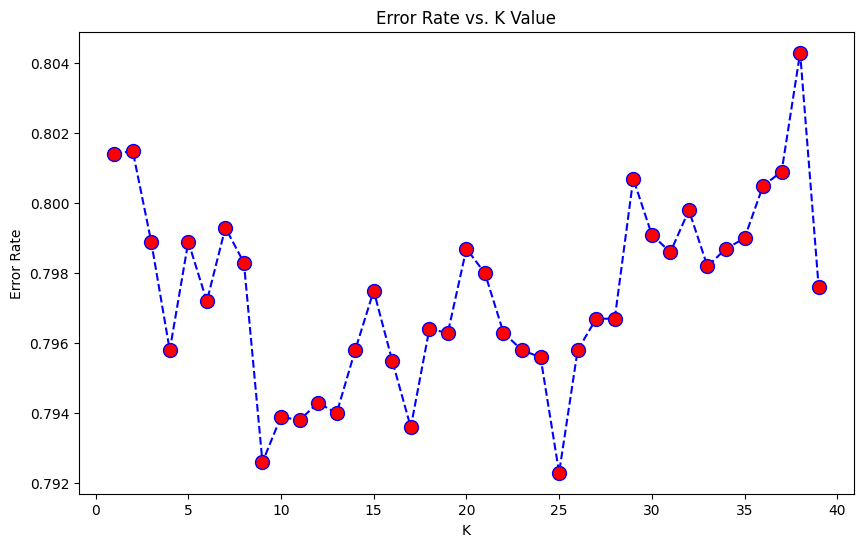

In [69]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.2077 at K = 24


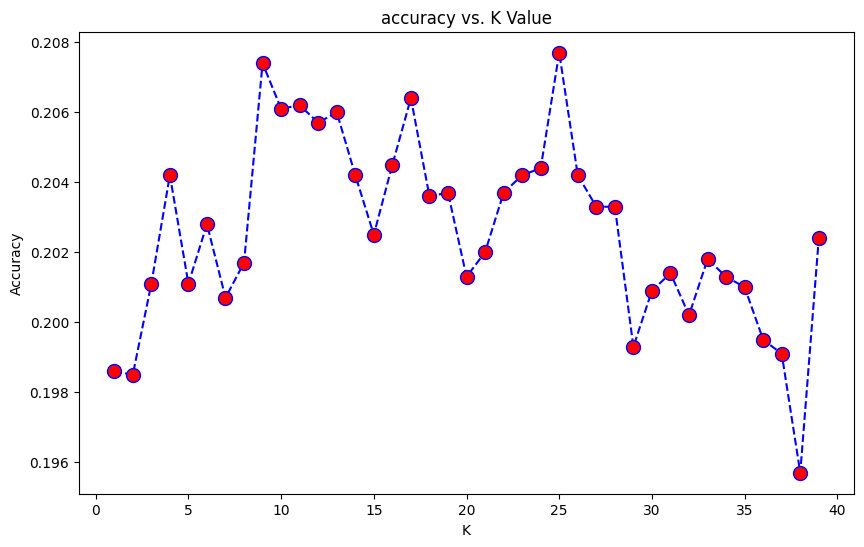

In [71]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [78]:
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
pred_y = neigh.predict(x_test)
len(pred_y)
len(y_test)
final_data = pd.DataFrame(pred_y, y_test)
final_data

,0
Category,
Music,Art
Music,Games
Games,Film
Art,Music
Film,Music
...,...
Art,Art
Games,Art
Technology,Games
